In [45]:
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import random
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import seaborn as sns

In [46]:
dfgym = pd.read_csv('Gym.csv')
dfgym.head()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [47]:
dfgym.columns

Index(['Unnamed: 0', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level',
       'Rating', 'RatingDesc'],
      dtype='object')

In [48]:
#Drop Class_number_of_rings column
dfgym=dfgym.drop(['Unnamed: 0', 'Rating','RatingDesc', 'Level'],axis=1)

In [49]:
#Check null values
dfgym.isnull().sum()

Title           0
Desc         1550
Type            0
BodyPart        0
Equipment       0
dtype: int64

In [50]:
dfgym = dfgym.dropna()

In [51]:
#dfgym_last_edit = dfgym

In [52]:
# dfgym.to_csv('dfgym_last_edit.csv', index=False)

In [53]:
dfgym.shape

(1368, 5)

In [54]:
dfgym.columns

Index(['Title', 'Desc', 'Type', 'BodyPart', 'Equipment'], dtype='object')

In [55]:
dfood = pd.read_csv('Recipe_Dataset.csv')
dfood.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [56]:
print(dfood['Cleaned_Ingredients'])

0        ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...
1        ['2 large egg whites', '1 pound new potatoes (...
2        ['1 cup evaporated milk', '1 cup whole milk', ...
3        ['1 (¾- to 1-pound) round Italian loaf, cut in...
4        ['1 teaspoon dark brown sugar', '1 teaspoon ho...
                               ...                        
13496    ['1 cup all-purpose flour', '2/3 cup unsweeten...
13497    ['1 preserved lemon', '1 1/2 pound butternut s...
13498    ['Leftover katsuo bushi (dried bonito flakes) ...
13499    ['1 stick (1/2 cup) plus 1 tablespoon unsalted...
13500    ['12 medium to large fresh poblano chiles (2 1...
Name: Cleaned_Ingredients, Length: 13501, dtype: object


In [57]:
# Assuming you want to print the record at index 0 from the 'Cleaned_Ingredients' column
specific_record = dfood['Cleaned_Ingredients'][0]
print(specific_record)

['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash (about 3 lb. total)', '2 Tbsp. finely chopped sage', '1 Tbsp. finely chopped rosemary', '6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature', '¼ tsp. ground allspice', 'Pinch of crushed red pepper flakes', 'Freshly ground black pepper', '⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)', '2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces', '2 Tbsp. extra-virgin olive oil', '½ small red onion, thinly sliced', '3 Tbsp. apple cider vinegar', '1 Tbsp. white miso', '¼ cup all-purpose flour', '2 Tbsp. unsalted butter, room temperature', '¼ cup dry white wine', '2 cups unsalted chicken broth', '2 tsp. white miso', 'Kosher salt', 'freshly ground pepper']


In [58]:
dfood.shape

(13501, 6)

In [59]:
dfood.columns

Index(['Unnamed: 0', 'Title', 'Ingredients', 'Instructions', 'Image_Name',
       'Cleaned_Ingredients'],
      dtype='object')

In [60]:
dfood = dfood.drop(['Unnamed: 0', 'Ingredients', 'Image_Name'],axis=1)

In [61]:
dfood.shape

(13501, 3)

In [62]:
dfood.isnull().sum()

Title                  5
Instructions           8
Cleaned_Ingredients    0
dtype: int64

In [63]:
dfood = dfood.dropna()

In [64]:
#dfood_last_edit = dfood

In [65]:
#dfood.to_csv('dfood_lastedit.csv', index=False)

In [66]:
dfood.shape

(13493, 3)

In [67]:
# loading the dataset
df = pd.read_csv('MyGP.csv',encoding='latin1')
df.head()

,Query,Intent
0,Can you suggest some low-carb dinner recipes?,Recipe Recommendation
1,Can you suggest some low-carb dinner recipes?,Recipe Recommendation
2,Can you suggest some low-carb dinner recipes?,Recipe Recommendation
3,Can you suggest some high-fiber breakfast opti...,Recipe Recommendation
4,Can you suggest some heart-healthy recipes?,Recipe Recommendation


In [68]:
df.shape

(1513, 2)

In [69]:
df['Intent'].unique()

array(['Recipe Recommendation', 'Exercise Recommendation', 'Support'],
      dtype=object)

<AxesSubplot:xlabel='Intent', ylabel='count'>

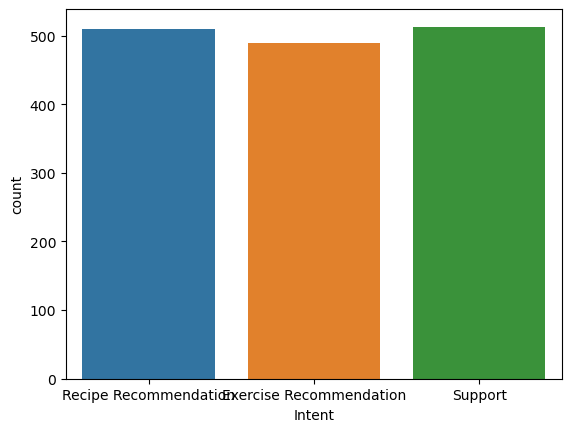

In [70]:
# Counts number of females, males, and infants
sns.countplot(data=df, x='Intent')

In [71]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saad3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saad3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
port_stem = PorterStemmer()

In [73]:
# Define stopwords
stop_words = set(stopwords.words('english'))

In [74]:
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [port_stem.stem(word) for word in tokens]
    return tokens

In [75]:
# Apply the function on text column
# Convert all values in 'Query' column to strings
df['Query'] = df['Query'].apply(preprocess_text)

In [76]:
sentences = df['Query']
sg_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=1)

In [31]:
sg_model.save("sg_model.bin")

In [77]:
def text_to_vectors(text):
    vectors = []
    for word in text:
        if word in sg_model.wv:
            vectors.append(sg_model.wv[word])
    return np.mean(vectors, axis=0) if vectors else np.zeros(sg_model.vector_size)

In [78]:
# Convert text data into word vectors
X = df['Query'].apply(text_to_vectors)
X = np.vstack(X)
y = df['Intent']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

# Evaluate the accuracy
accuracy = classifier.score(X_test, y_test)
accuracy1 = classifier.score(X_train, y_train)
print("Accuracy test:", accuracy)
print("Accuracy train:", accuracy1)

Accuracy test: 0.9504950495049505
Accuracy train: 0.9611570247933884


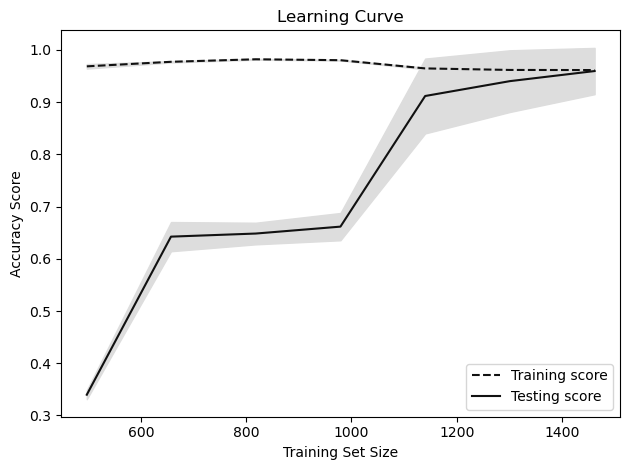

In [74]:
# Draw learning curve for LogisticRegression model
from sklearn.model_selection import learning_curve

# Compute the learning curve with 30-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(random_state = 42), X, y, cv=30, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [32]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=5, max_leaf_nodes=9, n_jobs=-1, random_state=42)
RFC.fit(X_train, y_train)

print("Accuracy for RandomForest on training set: {:.3f}".format(RFC.score(X_train, y_train)))
print("Accuracy for RandomForest on testing set: {:.3f}\n".format(RFC.score(X_test, y_test)))

Accuracy for RandomForest on training set: 0.988
Accuracy for RandomForest on testing set: 0.977



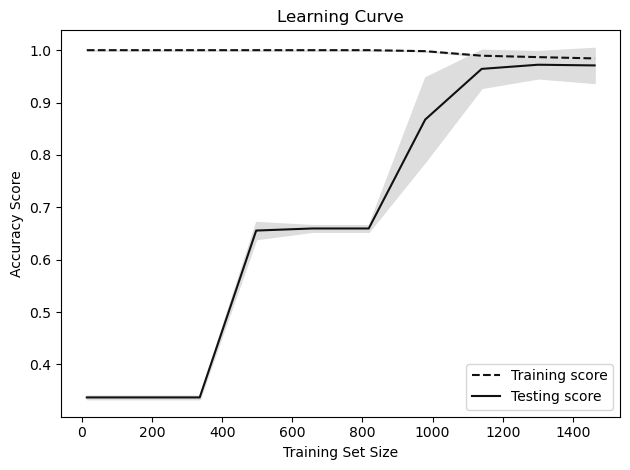

In [75]:
# Draw learning curve for LogisticRegression model
from sklearn.model_selection import learning_curve

# Compute the learning curve with 30-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=5, max_leaf_nodes=9, n_jobs=-1, random_state=42), X, y, cv=30, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [33]:
#Apply SVC model on the dataset
from sklearn.svm import SVC
SVM = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
SVM.fit(X_train, y_train)
# Evaluate the accuracy
accuracy = SVM.score(X_test, y_test)
accuracy1 = SVM.score(X_train, y_train)
print("Accuracy test:", accuracy)
print("Accuracy train:", accuracy1)

Accuracy test: 0.9570957095709571
Accuracy train: 0.9628099173553719


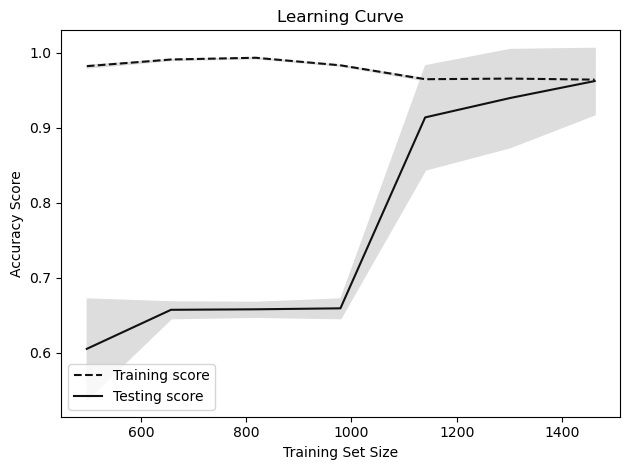

In [76]:
# Draw learning curve for LogisticRegression model
from sklearn.model_selection import learning_curve

# Compute the learning curve with 30-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear', C=1.0, probability=True, random_state=42), X, y, cv=30, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [80]:
#Apply k- Nearest Neighbors (K-NN) model on the dataset
from sklearn.neighbors import KNeighborsClassifier
import joblib
KNN = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
KNN.fit(X_train, y_train)
# Evaluate the accuracy
accuracy = KNN.score(X_test, y_test)
accuracy1 = KNN.score(X_train, y_train)
print("Accuracy test:", accuracy)
print("Accuracy train:", accuracy1)
# Save the model
joblib_file = "knn_model.joblib"
joblib.dump(KNN, joblib_file)
print(f"Model saved as {joblib_file}")

Accuracy test: 0.9735973597359736
Accuracy train: 0.9793388429752066
Model saved as knn_model.joblib


C:\DRIVERS\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\DRIVERS\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

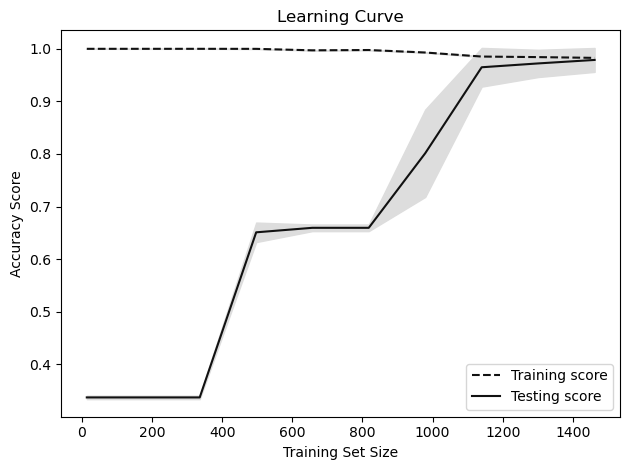

In [81]:
# Draw learning curve for LogisticRegression model
from sklearn.model_selection import learning_curve

# Compute the learning curve with 30-fold cross-validation and 10 train sizes
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors = 5, metric='euclidean'), X, y, cv=30, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


# Plot the mean training and test scores as a function of train_sizes
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [80]:
from sklearn.metrics import classification_report, confusion_matrix
# Confusion Matrix and Classification Report for K-NN
knn_y_pred = KNN.predict(X_test)
print("K-NN Classification Report:\n", classification_report(y_test, knn_y_pred))
print("K-NN Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred))

# Confusion Matrix and Classification Report for SVC
svm_y_pred = SVM.predict(X_test)
print("SVC Classification Report:\n", classification_report(y_test, svm_y_pred))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))

# Confusion Matrix and Classification Report for Random Forest
rfc_y_pred = RFC.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rfc_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rfc_y_pred))

lr_y_pred = classifier.predict(X_test)
print("LR Classification Report:\n", classification_report(y_test, lr_y_pred))
print("LR Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))


K-NN Classification Report:
                          precision    recall  f1-score   support

Exercise Recommendation       0.98      1.00      0.99       102
  Recipe Recommendation       0.96      0.98      0.97        98
                Support       0.98      0.94      0.96       103

               accuracy                           0.97       303
              macro avg       0.97      0.97      0.97       303
           weighted avg       0.97      0.97      0.97       303

K-NN Confusion Matrix:
 [[102   0   0]
 [  0  96   2]
 [  2   4  97]]
SVC Classification Report:
                          precision    recall  f1-score   support

Exercise Recommendation       0.99      0.99      0.99       102
  Recipe Recommendation       0.97      0.92      0.94        98
                Support       0.92      0.96      0.94       103

               accuracy                           0.96       303
              macro avg       0.96      0.96      0.96       303
           weighted avg

In [82]:
import numpy as np

new_questions = [
    "How to change my plan?",
    "Can you recommend a recipe for a vegetarian lasagna?",
    "Hi?",
    "What should i TRAIN in the gym?"
]


# Preprocess and vectorize new questions
preprocessed_questions = [preprocess_text(question) for question in new_questions]
vectorized_questions = [text_to_vectors(question) for question in preprocessed_questions]


# Predict categories for new questions
predictions = KNN.predict(vectorized_questions)



# Print predicted categories as strings
for question, category_code in zip(new_questions, predictions):

    print(f"Question: {question} \t Predicted Category: {category_code}")






Question: How to change my plan? 	 Predicted Category: Support
Question: Can you recommend a recipe for a vegetarian lasagna? 	 Predicted Category: Recipe Recommendation
Question: Hi? 	 Predicted Category: Support
Question: What should i TRAIN in the gym? 	 Predicted Category: Exercise Recommendation


C:\DRIVERS\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [2]:
data = pd.read_csv('Chatbot.csv')
data.head()

,Question,answers
0,How do I contact customer support?,You can contact customer support via email at ...
1,How can I add an inquiry?,You can add an inquiry by visiting the 'Contac...
2,How do I reset my password?,"To reset your password, click on 'Forgot Passw..."
3,How do I update my account information?,You can update your account information in the...
4,How do I cancel my subscription?,"To cancel your subscription, go to your accoun..."


In [3]:
data.shape

(556, 2)

In [5]:
!pip install transformers

In [4]:
import torch
import json
from tqdm import tqdm
import torch.nn as nn
from torch.optim import Adam
import nltk
import spacy
import string
import evaluate  
from torch.utils.data import Dataset, DataLoader, RandomSampler
import pandas as pd
import numpy as np
import transformers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from transformers import T5Tokenizer, T5Model, T5ForConditionalGeneration, T5TokenizerFast


import warnings
warnings.filterwarnings("ignore")

In [5]:
# Define the model t5-base 
TOKENIZER = T5TokenizerFast.from_pretrained("t5-base")
MODEL = T5ForConditionalGeneration.from_pretrained("t5-base", return_dict=True)
OPTIMIZER = Adam(MODEL.parameters(), lr=0.00001)
Q_LEN = 256   # Question Length
T_LEN = 128   # Target Length
BATCH_SIZE = 2

In [6]:
# Custom Dataset Class
class QA_Dataset(Dataset):
    def __init__(self, tokenizer, df, q_len, t_len):
        self.tokenizer = tokenizer
        self.q_len = q_len
        self.t_len = t_len
        self.data = df
        self.questions = self.data["Question"]
        self.answers = self.data["answers"]
        
    def __len__(self):
        return len(self.questions)
    
    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]
        
        question_tokenized = self.tokenizer(question, max_length=self.q_len, padding="max_length", truncation=True,
                                            pad_to_max_length=True, add_special_tokens=True)
        answer_tokenized = self.tokenizer(answer, max_length=self.t_len, padding="max_length", truncation=True,
                                            pad_to_max_length=True, add_special_tokens=True)
        
        labels = torch.tensor(answer_tokenized["input_ids"], dtype=torch.long)
        labels[labels == 0] = -100
        
        return {
            "input_ids": torch.tensor(question_tokenized["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(question_tokenized["attention_mask"], dtype=torch.long),
            "labels": labels,
            "decoder_attention_mask": torch.tensor(answer_tokenized["attention_mask"], dtype=torch.long)
        }

In [7]:
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)

train_sampler = RandomSampler(train_df.index)
val_sampler = RandomSampler(val_df.index)

qa_dataset = QA_Dataset(TOKENIZER, data, Q_LEN, T_LEN)

train_loader = DataLoader(qa_dataset, batch_size=BATCH_SIZE, sampler=train_sampler)
val_loader = DataLoader(qa_dataset, batch_size=BATCH_SIZE, sampler=val_sampler)



Validation batches: 100%|██████████████████████████████████████████████████████████████| 56/56 [03:46<00:00,  4.05s/it]


1/2 -> Train loss: 1.870433019625174	Validation loss: 0.9694205054215023


Validation batches: 100%|██████████████████████████████████████████████████████████████| 56/56 [03:44<00:00,  4.01s/it]

2/2 -> Train loss: 1.578597272637191	Validation loss: 0.8210737540253571


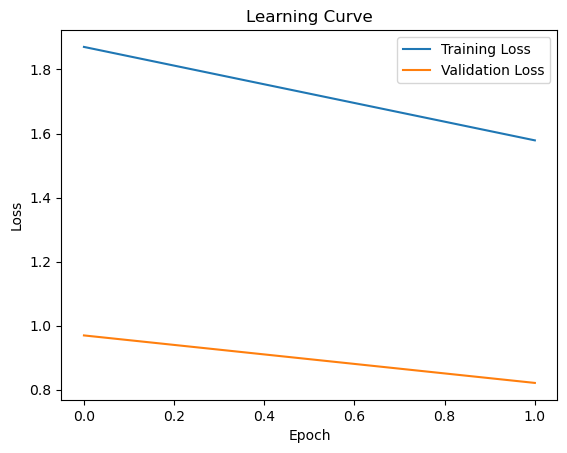

In [8]:
train_loss = 0
val_loss = 0
train_batch_count = 0
val_batch_count = 0
train_losses = []
val_losses = []
# i only do 2 epochs because the time of executing
for epoch in range(2):
    MODEL.train()
    for batch in tqdm(train_loader, desc="Training batches"):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["labels"]
        decoder_attention_mask = batch["decoder_attention_mask"]

        outputs = MODEL(
                          input_ids=input_ids,
                          attention_mask=attention_mask,
                          labels=labels,
                          decoder_attention_mask=decoder_attention_mask
                        )

        OPTIMIZER.zero_grad()
        outputs.loss.backward()
        OPTIMIZER.step()
        train_loss += outputs.loss.item()
        train_batch_count += 1
        # Calculate average training loss for the epoch
    avg_train_loss = train_loss / train_batch_count
    train_losses.append(avg_train_loss)
    #Evaluation
    MODEL.eval()
    for batch in tqdm(val_loader, desc="Validation batches"):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["labels"]
        decoder_attention_mask = batch["decoder_attention_mask"]

        outputs = MODEL(
                          input_ids=input_ids,
                          attention_mask=attention_mask,
                          labels=labels,
                          decoder_attention_mask=decoder_attention_mask
                        )

        OPTIMIZER.zero_grad()
        outputs.loss.backward()
        OPTIMIZER.step()
        val_loss += outputs.loss.item()
        val_batch_count += 1
        # Calculate average validation loss for the epoch
    avg_val_loss = val_loss / val_batch_count
    val_losses.append(avg_val_loss)    
        
    print(f"{epoch+1}/{2} -> Train loss: {train_loss / train_batch_count}\tValidation loss: {val_loss/val_batch_count}")
    
# Plot the learning curve
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [9]:
# Save the model 
MODEL.save_pretrained("bot_model")
TOKENIZER.save_pretrained("bot_tokenizer")

('bot_tokenizer\\tokenizer_config.json',
 'bot_tokenizer\\special_tokens_map.json',
 'bot_tokenizer\\spiece.model',
 'bot_tokenizer\\added_tokens.json',
 'bot_tokenizer\\tokenizer.json')

In [10]:
# Define a function to predict answer
def predict_answer(question, ref_answer=None):
    inputs = TOKENIZER(question, max_length=Q_LEN, padding="max_length", truncation=True, add_special_tokens=True)
    
    input_ids = torch.tensor(inputs["input_ids"], dtype=torch.long).unsqueeze(0)
    attention_mask = torch.tensor(inputs["attention_mask"], dtype=torch.long).unsqueeze(0)

    outputs = MODEL.generate(input_ids=input_ids, attention_mask=attention_mask)
  
    predicted_answer = TOKENIZER.decode(outputs.flatten(), skip_special_tokens=True)
    
    if ref_answer:
        # Load the Bleu metric
        bleu = evaluate.load("google_bleu")
        score = bleu.compute(predictions=[predicted_answer], 
                            references=[ref_answer])
    

        print("Question: \n", question)
        return {
            "Reference Answer: ": ref_answer, 
            "Predicted Answer: ": predicted_answer, 
            "BLEU Score: ": score
        }
    else:
        return predicted_answer

In [13]:
question = data.iloc[50]["Question"]
answer = data.iloc[50]["answers"]
predict_answer(question, answer)

Question: 
 How do I view my recent activities?


{'Reference Answer: ': "View your recent activities in the 'Activity' section of your account settings.",
 'Predicted Answer: ': "View your recent activities in the 'Activities' section of your account settings.",
 'BLEU Score: ': {'google_bleu': 0.782608695652174}}

In [8]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model = T5ForConditionalGeneration.from_pretrained("bot_model")
tokenizer = T5Tokenizer.from_pretrained("bot_tokenizer")

# Function to generate response
def generate2(input_text):
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=256, truncation=True, add_special_tokens=True)
    output = model.generate(input_ids=input_ids, max_length=128)
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

user_input = "How to reset my password?"
response = generate2(user_input)

print("Qusetion", user_input)
print("T5-Response:", response)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Qusetion How to reset my password?
T5-Response: Reset your password in the 'Profile' section of your account settings.


In [84]:
import random
import tkinter as tk
from tkinter import messagebox


model = T5ForConditionalGeneration.from_pretrained("bot_model")
tokenizer = T5Tokenizer.from_pretrained("bot_tokenizer")
# Define function to generate response based on model prediction
def generate_response(prediction, dfood, dfgym, user_input):
    if prediction == "Recipe Recommendation":
        # Access recipe dataset and select a random recipe
        random_index = random.randint(0, len(dfood) - 1)
        random_recipe = dfood.iloc[random_index]
        title = random_recipe['Title']
        ingredients = random_recipe['Cleaned_Ingredients']
        instructions = random_recipe['Instructions']
        
        # Construct response message with recipe details
        response = f"Sure! Here's a recipe for {title}:\n"
        
        response += f"\nIngredients \n {ingredients} \n"

        response += f"\nInstructions \n {instructions}\n"

    elif prediction == "Exercise Recommendation": 
        # Access recipe dataset and select a random recipe
        random_indexgym = random.randint(0, len(dfgym) - 1)
        random_exe = dfgym.iloc[random_indexgym]
        
        exe_title = random_exe['Title']
        Desc = random_exe['Desc']
        body_part = random_exe['BodyPart']
        Equipment = random_exe['Equipment']

        # Construct response message with recipe details
        response = f"I suggest you to do {exe_title} exercise\n"

        response += f"\n Focus on \n {body_part} \n"

        response += f"\n Do it using \n {Equipment}\n"

        response += f"\n Description \n {Desc}\n"
        
    elif prediction == "Support":
        
        input_ids = tokenizer.encode(user_input, return_tensors="pt", max_length=256, truncation=True, add_special_tokens=True)
        output = model.generate(input_ids=input_ids, max_length=128)
        response = tokenizer.decode(output[0], skip_special_tokens=True)
            
        
    else:
        # If prediction is not "Recipe Recommendation", generate a generic response
        response = "I'm sorry, I couldn't find a suitable recommendation for you at the moment."
    
    return response

# Function to make prediction based on user input
def make_prediction(user_input, dfood, dfgym):
    # Preprocess and vectorize user input
    preprocessed_input = preprocess_text(user_input) 
    vectorized_input = text_to_vectors(preprocessed_input)
    
    # Reshape vectorized input
    vectorized_input = vectorized_input.reshape(1, -1)
    
    # Make prediction based on vectorized input
    prediction = KNN.predict(vectorized_input)
    
    # Generate response based on prediction
    response = generate_response(prediction, dfood, dfgym, user_input)
    return response

def get_recommendation():
    user_input = entry.get().strip()
    if user_input:
        response = make_prediction(user_input, dfood, dfgym)
        messagebox.showinfo("Recommendation", response)
    else:
        messagebox.showwarning("Error", "Please enter a question")

# Example usage:
if __name__ == "__main__":
    root = tk.Tk()
    root.title("Recommendation Chatbot")

    label = tk.Label(root, text="What do you want a recommendation for?")
    label.pack()

    entry = tk.Entry(root, width=30)
    entry.pack()

    button = tk.Button(root, text="Get Recommendation", command=get_recommendation)
    button.pack()

    root.mainloop()


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
C:\DRIVERS\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
